In [459]:
# Comparing RO to splined RO at tm1, t, and tp1, predicting poses in the future

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rc("font", family=settings.FONT_FAMILY)
plt.rcParams['axes.titlepad'] = 20
plt.rcParams.update({'font.size': 16}) # was 28
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
# text

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

colour_ro = u'#d62728' #red
colour_spline_tm1 = u'#1f77b4' #blue
colour_spline_t = u'#ff7f0e' #orange
colour_spline_tp1 = u'#2ca02c' #green
colour_ins = 'black' #black

In [460]:
dataset_path = "/tmp/"

RO_relative_poses_path = dataset_path+"ro_relative_poses.monolithic"
# interpolation_relative_poses_path = dataset_path+"ro_relative_poses_interpolation_corrected.monolithic"
spline_tm1_relative_poses_path = dataset_path+"ro_relative_poses_spline_tm1.monolithic"
spline_t_relative_poses_path = dataset_path+"ro_relative_poses_spline_t.monolithic"
spline_tp1_relative_poses_path = dataset_path+"ro_relative_poses_spline_tp1.monolithic"
# spline_relative_poses_path = dataset_path+"ro_relative_poses_spline_corrected.monolithic"

In [461]:
# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])

# Splined tm1 RO - open monolithic and iterate frames
print("reading spline_relative_poses_path: " + spline_tm1_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    spline_tm1_relative_poses_path)

# iterate mono
spline_tm1_se3s = []
spline_tm1_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    spline_tm1_se3s.append(serialised_transform[0])
    spline_tm1_timestamps.append(serialised_transform[1])
    
# Spline t RO - open monolithic and iterate frames
print("reading spline_t_relative_poses_path: " + spline_t_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    spline_t_relative_poses_path)

# iterate mono
spline_t_se3s = []
spline_t_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    spline_t_se3s.append(serialised_transform[0])
    spline_t_timestamps.append(serialised_transform[1])
    
# Spline tp1 RO - open monolithic and iterate frames
print("reading spline_relative_poses_path: " + spline_tp1_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    spline_tp1_relative_poses_path)

# iterate mono
spline_tp1_se3s = []
spline_tp1_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    spline_tp1_se3s.append(serialised_transform[0])
    spline_tp1_timestamps.append(serialised_transform[1])
    

    
print("\nFinished importing.")
print(RO_timestamps[0])
print(spline_tm1_timestamps[0])
print(spline_t_timestamps[0])
print(spline_tp1_timestamps[0])

RO_se3s = RO_se3s[3:]
RO_timestamps = RO_timestamps[3:]
spline_tm1_se3s = spline_tm1_se3s[2:]
spline_tm1_timestamps = spline_tm1_timestamps[2:]
spline_t_se3s = spline_t_se3s[1:]
spline_t_timestamps = spline_t_timestamps[1:]
# interpolation_se3s = interpolation_se3s[1:]
# interpolation_timestamps = interpolation_timestamps[1:]
print("Cropped first N estimates from RO for easier data analysis when comparing with spline estimates.")

print("Cropped timestamp difference RO to spline_tm1: ", RO_timestamps[0] - spline_tm1_timestamps[0])
print("Cropped timestamp difference RO to spline_t: ", RO_timestamps[0] - spline_t_timestamps[0])
print("Cropped timestamp difference RO to spline_tp1: ", RO_timestamps[0] - spline_tp1_timestamps[0])

reading RO_relative_poses_path: /tmp/ro_relative_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading spline_relative_poses_path: /tmp/ro_relative_poses_spline_tm1.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading spline_t_relative_poses_path: /tmp/ro_relative_poses_spline_t.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading spline_relative_poses_path: /tmp/ro_relative_poses_spline_tp1.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2

Finished importing.
1503051705355940
1503051705605628
1503051705855215
1503051706104903
Cropped first N estimates from RO for easier data analysis when comparing with spline estimates.
Cropped timestamp difference RO to spline_tm1:  0
Cropped timestamp difference RO to spline_t:  0
Cropped timestamp difference RO to spline_tp1:  -136


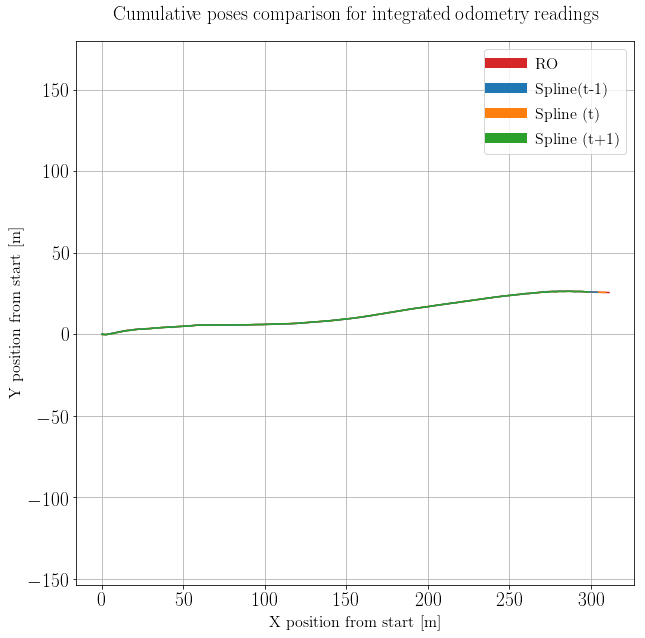

In [462]:
# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get spline_tm1 poses
spline_tm1_poses = []
pose = np.identity(4)
for i in range(len(spline_tm1_se3s)):
    pose = pose * spline_tm1_se3s[i]
    spline_tm1_poses.append(pose)

# get x,y coords
x_spline_tm1 = [pose[0, 3] for pose in spline_tm1_poses]
y_spline_tm1 = [pose[1, 3] for pose in spline_tm1_poses]

# get spline_t poses
spline_t_poses = []
pose = np.identity(4)
for i in range(len(spline_t_se3s)):
    pose = pose * spline_t_se3s[i]
    spline_t_poses.append(pose)

# get x,y coords
x_spline_t = [pose[0, 3] for pose in spline_t_poses]
y_spline_t = [pose[1, 3] for pose in spline_t_poses]

# get spline tp1 poses
spline_tp1_poses = []
pose = np.identity(4)
for i in range(len(spline_tp1_se3s)):
    pose = pose * spline_tp1_se3s[i]
    spline_tp1_poses.append(pose)

# get x,y coords
x_spline_tp1 = [pose[0, 3] for pose in spline_tp1_poses]
y_spline_tp1 = [pose[1, 3] for pose in spline_tp1_poses]

plt.figure(figsize=(10,10)) # was 15,15
plt.plot(x_RO,y_RO,'-',color=colour_ro,markersize=1);
plt.plot(x_spline_tm1,y_spline_tm1,'-',color=colour_interpolation,markersize=1);
plt.plot(x_spline_t,y_spline_t,'-',color=colour_spline,markersize=1);
plt.plot(x_spline_tp1,y_spline_tp1,'-',color=colour_aux_1,markersize=1);
plt.axis('equal');
plt.title('Cumulative poses comparison for integrated odometry readings');
plt.xlabel('X position from start [m]');
plt.ylabel('Y position from start [m]');
line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline(t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

# plt.xlim(150, 200)
# plt.ylim(0,20)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.savefig(dataset_path+"figs/filename_all_poses.pdf",bbox_inches='tight',pad_inches = 0)

In [463]:
# RO_se3s[i][0,3]

10.332687850539113
8.335067945080027
14.097691753698037
56.110296677800754


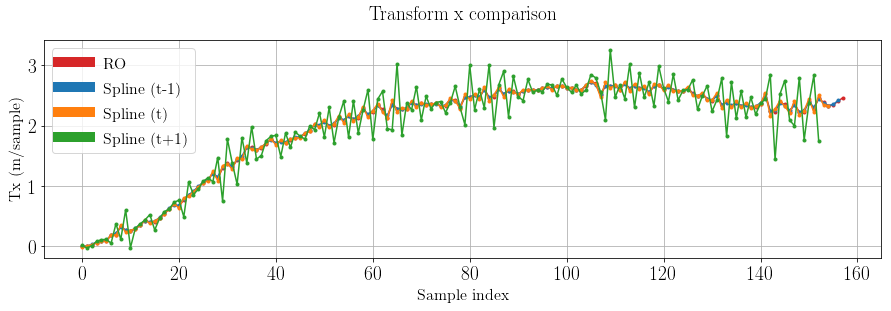

In [464]:
# get RO tx
RO_tx = []
for i in range(1,len(RO_se3s)):
    RO_tx.append(RO_se3s[i][0,3])

# get spline tm1 tx
spline_tm1_tx = []
for i in range(1,len(spline_tm1_se3s)):
    spline_tm1_tx.append(spline_tm1_se3s[i][0,3])
    
# get spline t tx
spline_t_tx = []
for i in range(1,len(spline_t_se3s)):
    spline_t_tx.append(spline_t_se3s[i][0,3])
    
# get spline tx
spline_tp1_tx = []
for i in range(1,len(spline_tp1_se3s)):
    spline_tp1_tx.append(spline_tp1_se3s[i][0,3])
    

    
# Velocities
plt.figure(figsize=(15,4))
plt.plot(RO_tx,'.-',color=colour_ro);
plt.plot(spline_tm1_tx,'.-',color=colour_spline_tm1);
plt.plot(spline_t_tx,'.-',color=colour_spline_t);
plt.plot(spline_tp1_tx,'.-',color=colour_spline_tp1);

# plt.ylim(6,8)
# plt.xlim(150,350)
line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline (t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Transform x comparison')
plt.xlabel('Sample index')
plt.ylabel('Tx (m/sample)')
#-----------------------------------------------------------------------------
print(np.sum(np.abs(np.diff(RO_tx))))
print(np.sum(np.abs(np.diff(spline_tm1_tx))))
print(np.sum(np.abs(np.diff(spline_t_tx))))
print(np.sum(np.abs(np.diff(spline_tp1_tx))))


Text(0,0.5,'Ty (m/sample)')

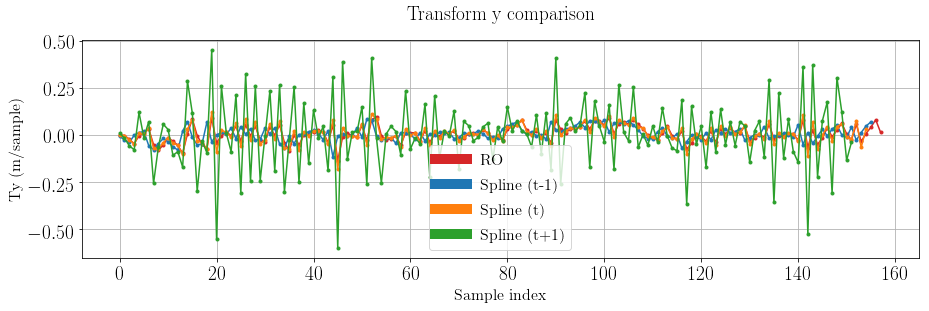

In [465]:
# get RO ty
RO_ty = []
for i in range(1,len(RO_se3s)):
    RO_ty.append(RO_se3s[i][1,3])

# get spline tm1 ty
spline_tm1_ty = []
for i in range(2,len(spline_tm1_se3s)):
    spline_tm1_ty.append(spline_tm1_se3s[i][1,3]) 
    
# get spline t ty
spline_t_ty = []
for i in range(1,len(spline_t_se3s)):
    spline_t_ty.append(spline_t_se3s[i][1,3])
    
# get spline tp1 ty
spline_tp1_ty = []
for i in range(2,len(spline_tp1_se3s)):
    spline_tp1_ty.append(spline_tp1_se3s[i][1,3]) 
    
# Velocities
plt.figure(figsize=(15,4))
plt.plot(RO_ty,'.-',color=colour_ro);
plt.plot(spline_tm1_ty,'.-',color=colour_spline_tm1);
plt.plot(spline_t_ty,'.-',color=colour_spline_t);
plt.plot(spline_tp1_ty,'.-',color=colour_spline_tp1);

# plt.ylim(6,8)
# plt.xlim(150,250)
line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline (t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Transform y comparison')
plt.xlabel('Sample index')
plt.ylabel('Ty (m/sample)')
#-----------------------------------------------------------------------------


In [466]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(RO_timestamps)):
    # work out speed
    delta_time = (RO_timestamps[i] - RO_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])

# Technically there's a more principled way to determine speed from the control points using spline fusion
# This method is naive differentiation, but the speeds will change slightly depending 
# on the resolution of the estimated points
assert len(spline_tm1_se3s) == len(spline_tm1_timestamps)
spline_tm1_speeds = []
spline_tm1_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(spline_tm1_timestamps)):
    # work out speed
    delta_time = (spline_tm1_timestamps[i] - spline_tm1_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = spline_tm1_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    spline_tm1_speeds.append(speed)
    spline_tm1_TIMESTAMPS.append(spline_tm1_timestamps[i])
    
assert len(spline_t_se3s) == len(spline_t_timestamps)
spline_t_speeds = []
spline_t_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(spline_t_timestamps)):
    # work out speed
    delta_time = (spline_t_timestamps[i] - spline_t_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = spline_t_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    spline_t_speeds.append(speed)
    spline_t_TIMESTAMPS.append(spline_t_timestamps[i])
    
assert len(spline_tp1_se3s) == len(spline_tp1_timestamps)
spline_tp1_speeds = []
spline_tp1_TIMESTAMPS = []
deltatime_arr = []
for i in range(1,len(spline_tp1_timestamps)):
    # work out speed
    delta_time = (spline_tp1_timestamps[i] - spline_tp1_timestamps[i - 1]) / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = spline_tp1_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    spline_tp1_speeds.append(speed)
    spline_tp1_TIMESTAMPS.append(spline_tp1_timestamps[i])
    
RO_seconds = [(timestamp - RO_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in RO_TIMESTAMPS]
spline_tm1_seconds = [(timestamp - spline_tm1_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in spline_tm1_TIMESTAMPS]
spline_t_seconds = [(timestamp - spline_t_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in spline_t_TIMESTAMPS]
spline_tp1_seconds = [(timestamp - spline_tp1_TIMESTAMPS[0]) / settings.TIMESTAMP_CONVERSION for timestamp in spline_tp1_TIMESTAMPS]

In [467]:
RO_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in RO_se3s]
spline_tm1_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in spline_tm1_se3s]
spline_t_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in spline_t_se3s]
spline_tp1_thetas = [np.arctan2(x[1, 0], x[0, 0]) for x in spline_tp1_se3s]

# RO yaw rates
RO_yaw_rates = []
for i in range(len(RO_timestamps) - 1):
    delta_time = (RO_timestamps[i + 1] - RO_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = RO_thetas[i] / delta_time
    RO_yaw_rates.append(yaw_rate)
    
# Spline yaw rates
spline_tm1_yaw_rates = []
for i in range(len(spline_tm1_timestamps) - 1):
    delta_time = (spline_tm1_timestamps[i + 1] - spline_tm1_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = spline_tm1_thetas[i] / delta_time
    spline_tm1_yaw_rates.append(yaw_rate)   

# Spline yaw rates
spline_t_yaw_rates = []
for i in range(len(spline_t_timestamps) - 1):
    delta_time = (spline_t_timestamps[i + 1] - spline_t_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = spline_t_thetas[i] / delta_time
    spline_t_yaw_rates.append(yaw_rate)   
    
# Spline yaw rates
spline_tp1_yaw_rates = []
for i in range(len(spline_tp1_timestamps) - 1):
    delta_time = (spline_tp1_timestamps[i + 1] - spline_tp1_timestamps[i]) / settings.TIMESTAMP_CONVERSION
    yaw_rate = spline_tp1_thetas[i] / delta_time
    spline_tp1_yaw_rates.append(yaw_rate) 

Text(0,0.5,'Velocity (m/s)')

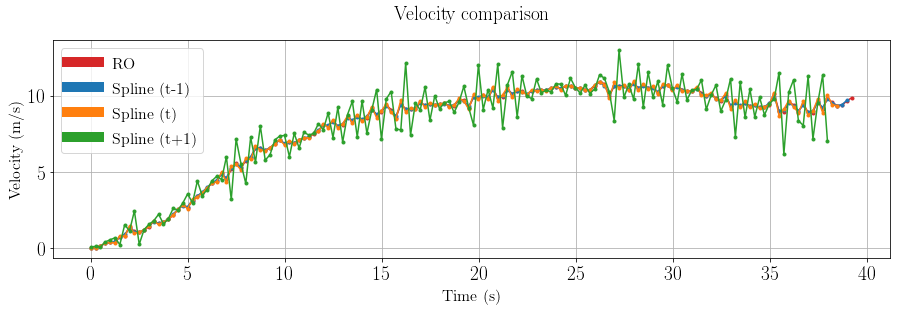

In [468]:
# Velocities
plt.figure(figsize=(15,4))
plt.plot(RO_seconds,RO_speeds,'.-',color=colour_ro);
plt.plot(spline_tm1_seconds,spline_tm1_speeds,'.-',color=colour_spline_tm1);
plt.plot(spline_t_seconds,spline_t_speeds,'.-',color=colour_spline_t);
plt.plot(spline_tp1_seconds,spline_tp1_speeds,'.-',color=colour_spline_tp1);

# plt.ylim(6,8)
# plt.xlim(5,10)
line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline (t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Velocity comparison')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
#-----------------------------------------------------------------------------


RO diff avg:           0.2628877265730955
Spline (t-1) diff avg: 0.21274906324194987
Spline (t) diff avg:   0.3637694199293848
Spline (t+1) diff avg: 1.4349496042317929


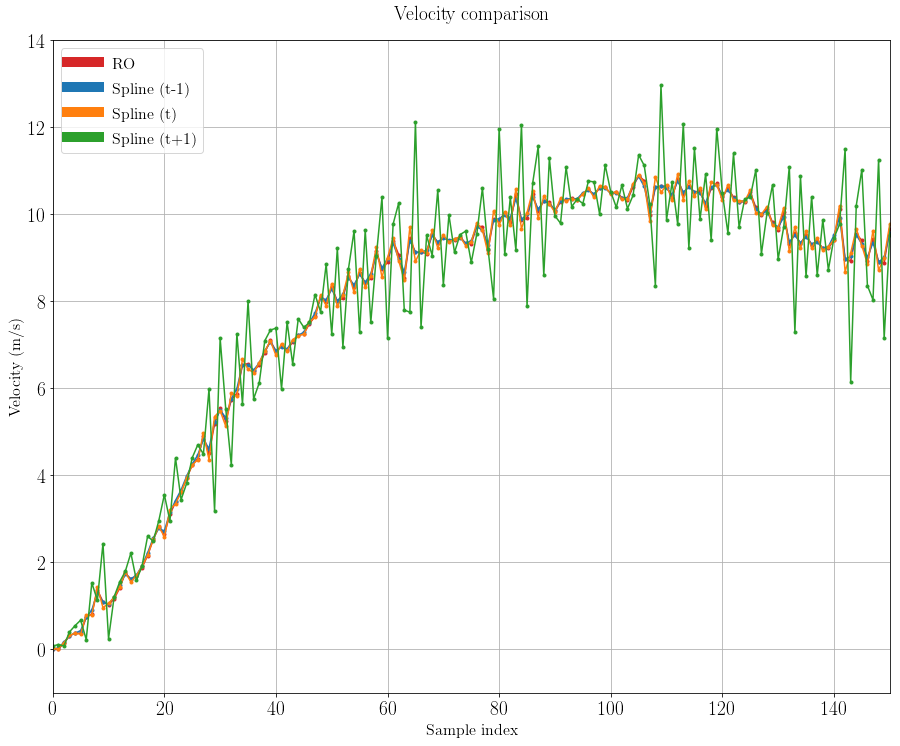

In [489]:
# Velocities
plt.figure(figsize=(15,12))
plt.plot(RO_speeds,'.-',color=colour_ro);
plt.plot(spline_tm1_speeds,'.-',color=colour_spline_tm1);
plt.plot(spline_t_speeds,'.-',color=colour_spline_t);
plt.plot(spline_tp1_speeds,'.-',color=colour_spline_tp1);

plt.ylim(-1,14)
plt.xlim(0,150)

line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline (t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
plt.title('Velocity comparison')
plt.xlabel('Sample index')
plt.ylabel('Velocity (m/s)')
#-----------------------------------------------------------------------------

from scipy import signal
filt_spline_speeds = signal.medfilt(spline_speeds,5);
# plt.plot(filt_spline_speeds,'.-',color=colour_interpolation);

#-----------------------------------------------------------------------------
print('RO diff avg:          ',np.sum(np.abs(np.diff(RO_speeds)))/len(RO_speeds))
print('Spline (t-1) diff avg:',np.sum(np.abs(np.diff(spline_tm1_speeds)))/len(spline_tm1_speeds))
print('Spline (t) diff avg:  ',np.sum(np.abs(np.diff(spline_t_speeds)))/len(spline_t_speeds))
print('Spline (t+1) diff avg:',np.sum(np.abs(np.diff(spline_tp1_speeds)))/len(spline_tp1_speeds))

Text(0,0.5,'Velocity (rad/s)')

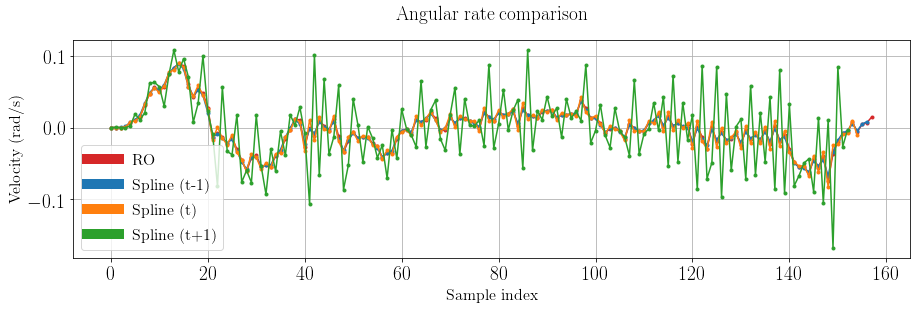

In [470]:
# Angular rates
plt.figure(figsize=(15,4))
plt.plot(RO_yaw_rates,'.-',color=colour_ro)
plt.plot(spline_tm1_yaw_rates,'.-',color=colour_spline_tm1)
plt.plot(spline_t_yaw_rates,'.-',color=colour_spline_t)
plt.plot(spline_tp1_yaw_rates,'.-',color=colour_spline_tp1)

line1, = plt.plot([],[],color=colour_ro,label='RO',linewidth=10.0)
line2, = plt.plot([],[],color=colour_spline_tm1,label='Spline (t-1)',linewidth=10.0)
line3, = plt.plot([],[],color=colour_spline_t,label='Spline (t)',linewidth=10.0)
line4, = plt.plot([],[],color=colour_spline_tp1,label='Spline (t+1)',linewidth=10.0)

plt.legend(handles=[line1,line2,line3,line4],loc='best')
# plt.xlim(80, 100)
# plt.ylim(0.025,0.05)
plt.title('Angular rate comparison')
plt.xlabel('Sample index')
plt.ylabel('Velocity (rad/s)')